In [1]:
import cv2
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

image = cv2.imread('../File/oil_test_03.jpg')
orig = image.copy()

# STEP 1 : Edge Detection

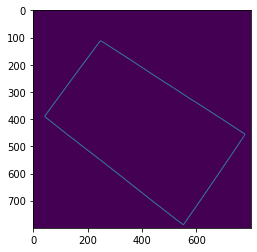

In [2]:
r = 800.0 / image.shape[0]
dim = (int(image.shape[1] * r), 800)
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9,9), 0)
edged = cv2.Canny(blur, 70, 150)

plt.imshow(edged)

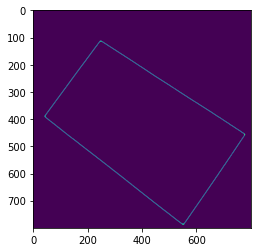

In [3]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
plt.imshow( closed)

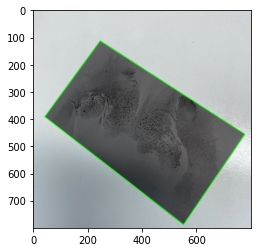

In [4]:
(cnts, _) = cv2.findContours(closed.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

cnts = sorted(cnts, key = cv2.contourArea, reverse=True)[:3]

for c in cnts:
    peri = cv2.arcLength(c,True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
    
    if len(approx) == 4:
        screenCnt = approx
        break
        
cv2.drawContours(image,[screenCnt], -1, (0,255,0), 2)

plt.imshow(image)

In [5]:
print(screenCnt)

[[[246 113]]

 [[ 43 391]]

 [[552 787]]

 [[777 455]]]


In [6]:
def order_points(pts):
    rect = np.zeros((4,2), dtype = "float32")
    
    s = pts.sum(axis = 1)
    
    rect[0] = pts[np.argmin(s)]
    rect[2] = pts[np.argmax(s)]
    
    diff = np.diff(pts, axis = 1)
    rect[1] = pts[np.argmin(diff)]
    rect[3] = pts[np.argmax(diff)]
    
    return rect

In [7]:
rect = order_points(screenCnt.reshape(4,2) / r)

(topLeft, topRight, bottomRight, bottomLeft) = rect

w1 = abs(bottomRight[0] - bottomLeft[0])
w2 = abs(topRight[0] - topLeft[0])
h1 = abs(topRight[1] - bottomRight[1])
h2 = abs(topLeft[1] - bottomLeft[1])

In [8]:
maxWidth = max([w1, w2])
maxHeight = max([h1, h2])

In [9]:
dst = np.float32([[0,0], [maxWidth-1,0], [maxWidth-1, maxHeight-1], [0,maxHeight-1]])

In [10]:
M = cv2.getPerspectiveTransform(rect, dst)

In [11]:
warped = cv2.warpPerspective(orig,M,(maxWidth,maxHeight))

<ipython-input-11-c02f6d8c19e2>:1: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  warped = cv2.warpPerspective(orig,M,(maxWidth,maxHeight))


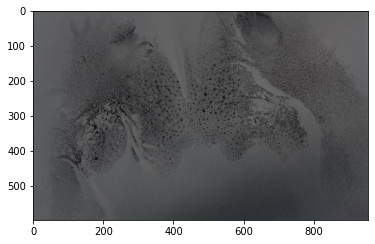

In [12]:
plt.imshow(warped)

In [13]:
warped = cv2.cvtColor(warped, cv2.COLOR_BGR2RGB)

In [14]:
warped = cv2.cvtColor(warped, cv2.COLOR_RGB2GRAY)

In [15]:
warped = cv2.adaptiveThreshold(warped, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 21, 10)

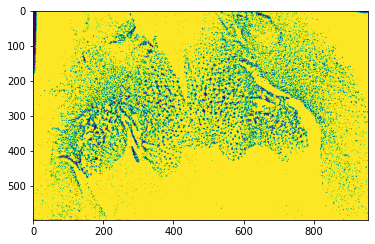

In [16]:
plt.imshow(warped)

(array([ 51569.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,      0.,      0.,      0.,      0.,      0.,
      

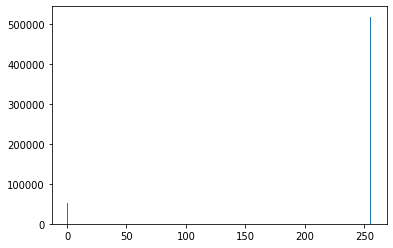

In [17]:
hist, bins = np.histogram(warped.ravel(), 256,[0,256])
plt.hist(warped.ravel(),256,[0,256])

In [22]:
# cv2.imwrite('../File/test_03_crop.jpg', warped)

True

In [19]:
warped.shape

(597, 955)

In [20]:
warped.size

570135

In [23]:
np.count_nonzero(warped == 0)

51569

In [25]:
int(np.count_nonzero(warped == 0))/int(warped.size)

0.09045050733598183